In [37]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os
import random

In [38]:
TRAIN_DIRECTORY = 'Image dataset deep/train'
TEST_DIRECTORY = 'Image dataset deep/test'

CLASS_NAMES = ['Alzheimer', 'COVID', 'Brazilian_Seeds', 'Brazilian_Leaves', 'Skin_Cancer']

In [39]:
def get_files(directory):
    files = []
    for dirname, _, filenames in os.walk(directory):
        for filename in filenames:
            files.append(os.path.join(dirname, filename))
    return files

def gray_scale(file):
    image = np.array(Image.open(file).convert('L').resize((50,50)))
    return image

def get_label(file):
    labels = {
        'Alzheimer': 0,
        'COVID': 1,
        'Brazilian_Seeds': 2,
        'Brazilian_Leaves': 3,
        'Skin_Cancer': 4
    }

    for k in labels.keys():
        if k in file:
            return [labels[k]]

def get_image(f):
    image = gray_scale(f)
    return image, get_label(f)

def get_lists(directory):
    images = []
    labels = []
    files = get_files(directory)
    for f in files:
        image, label = get_image(f)
        images.append(image)
        labels.append(label)
    return np.array(images), np.array(labels)

In [40]:
train_images, train_labels = get_lists(TRAIN_DIRECTORY)
test_images, test_labels = get_lists(TEST_DIRECTORY)

train_images = train_images.astype('float32') / 255.
test_images = test_images.astype('float32') / 255.

In [41]:
train_images.shape

(205, 50, 50)

In [42]:
test_labels.shape

(47, 1)

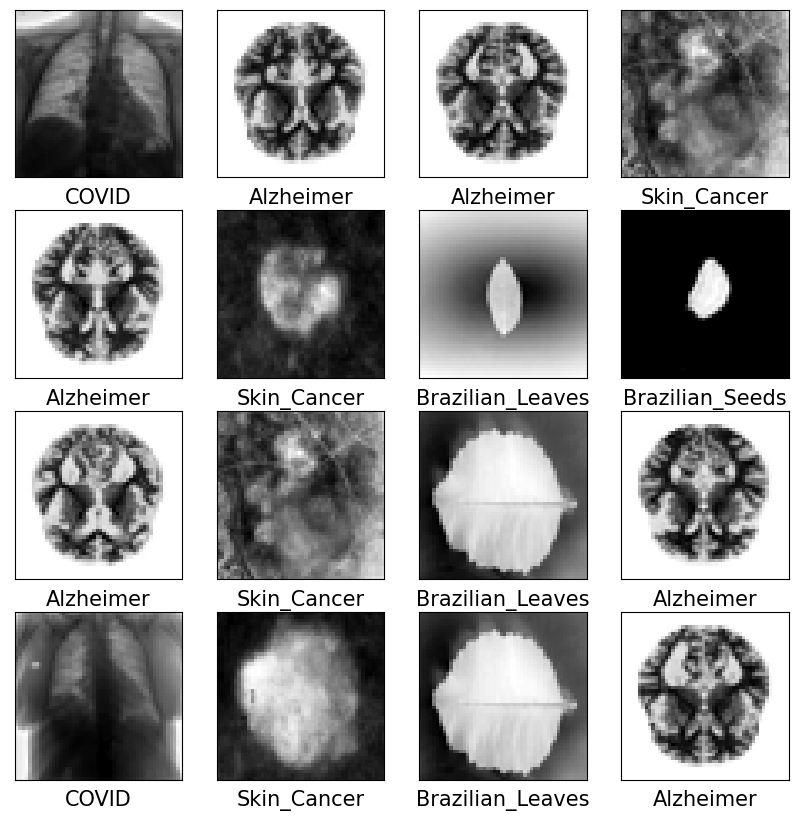

In [43]:
# Visualizando uma amostra dos dados
class_names = CLASS_NAMES

plt.figure(figsize=(10,10))
for i in range(16):
    k = int(len(train_images) * random.random())
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[k], cmap=plt.cm.binary)

    plt.xlabel(class_names[train_labels[k][0]], fontsize=15)
plt.show()

In [44]:
model = models.Sequential(name='DeepProcessosEstocasticos')
model.add(layers.Conv1D(32, 3, activation='relu', input_shape=(50, 50)))
model.add(layers.MaxPooling1D(2))
model.add(layers.Conv1D(64, 3, activation='relu'))
model.add(layers.MaxPooling1D(2))
model.add(layers.Conv1D(64, 3, activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(5))

model.summary()

Model: "DeepProcessosEstocasticos"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 48, 32)            4832      
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 24, 32)           0         
 1D)                                                             
                                                                 
 conv1d_4 (Conv1D)           (None, 22, 64)            6208      
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 11, 64)           0         
 1D)                                                             
                                                                 
 conv1d_5 (Conv1D)           (None, 9, 64)             12352     
                                                                 
 flatten_1 (Flatten)         (None, 576) 

In [45]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=30, 
                    validation_data=(test_images, test_labels))

Epoch 1/30
7/7 [==============================] - 1s 31ms/step - loss: 1.4290 - accuracy: 0.5317 - val_loss: 1.1313 - val_accuracy: 0.5745
Epoch 2/30
7/7 [==============================] - 0s 10ms/step - loss: 0.9353 - accuracy: 0.6293 - val_loss: 0.6847 - val_accuracy: 0.7872
Epoch 3/30
7/7 [==============================] - 0s 10ms/step - loss: 0.6181 - accuracy: 0.7366 - val_loss: 0.5382 - val_accuracy: 0.7660
Epoch 4/30
7/7 [==============================] - 0s 9ms/step - loss: 0.4908 - accuracy: 0.7561 - val_loss: 0.4523 - val_accuracy: 0.7660
Epoch 5/30
7/7 [==============================] - 0s 9ms/step - loss: 0.4466 - accuracy: 0.8049 - val_loss: 0.3781 - val_accuracy: 0.8723
Epoch 6/30
7/7 [==============================] - 0s 10ms/step - loss: 0.3605 - accuracy: 0.8244 - val_loss: 0.3459 - val_accuracy: 0.8298
Epoch 7/30
7/7 [==============================] - 0s 10ms/step - loss: 0.2907 - accuracy: 0.8878 - val_loss: 0.2895 - val_accuracy: 0.8723
Epoch 8/30
7/7 [=============

In [46]:
history_dict = model.history.history

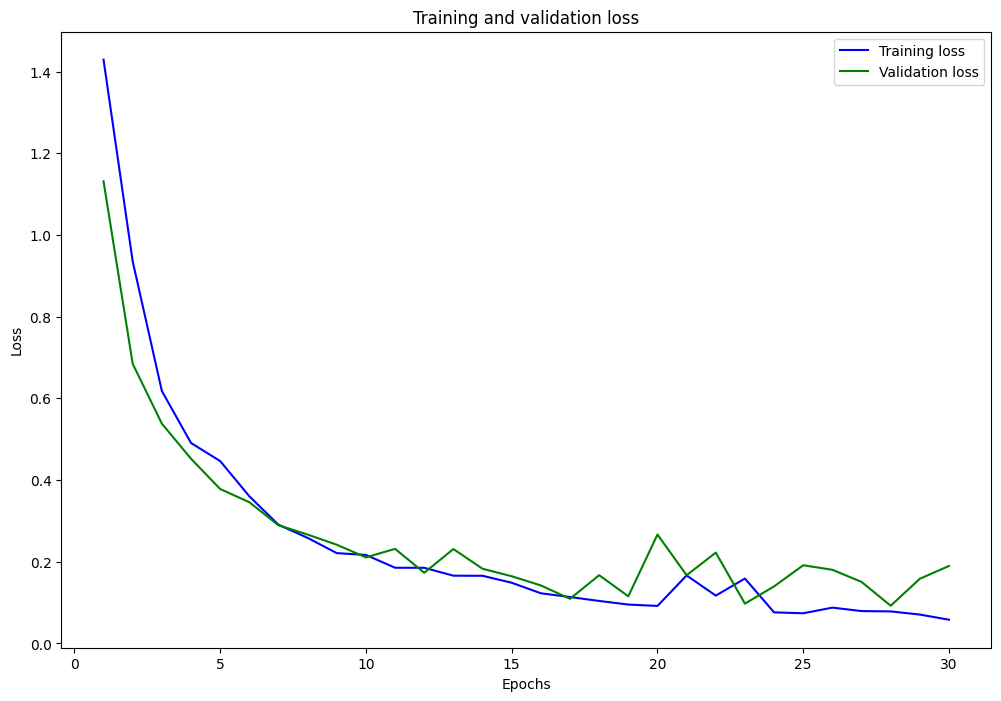

In [47]:
# loss
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1) 

# plot
plt.figure(figsize=(12, 8))
plt.plot(epochs, loss_values, 'blue',label='Training loss')
plt.plot(epochs, val_loss_values, 'green', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

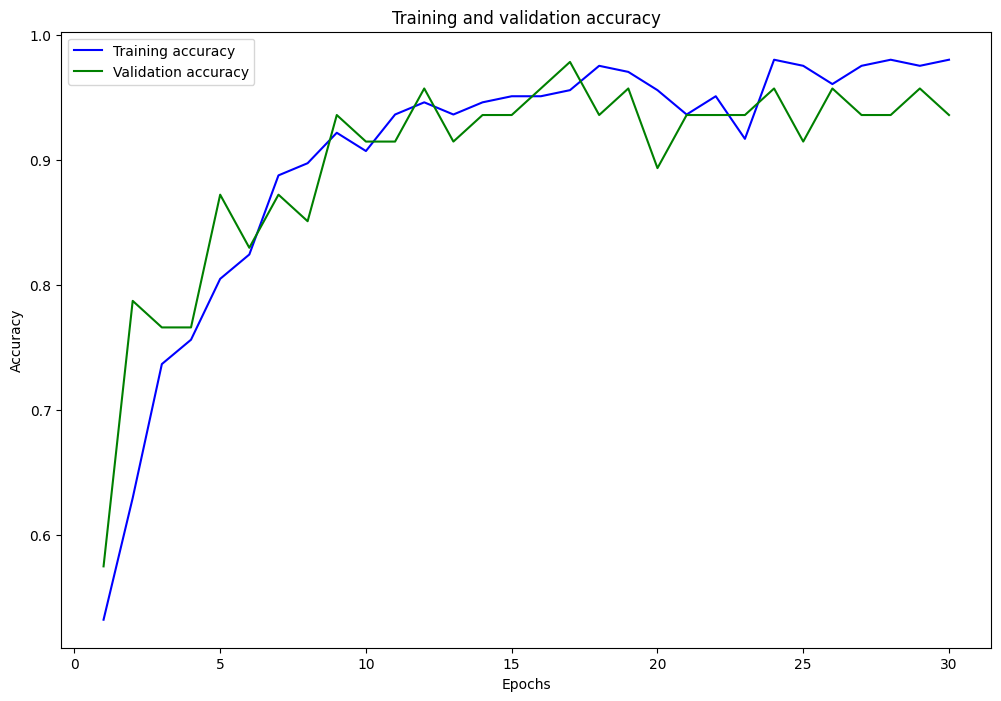

In [48]:
# accuracy
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

# range of X (no. of epochs)
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12, 8))
plt.plot(epochs, acc, 'blue',label='Training accuracy')
# orange is for "orange"
plt.plot(epochs, val_acc, 'green', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [49]:
print("Test set accuracy = {} %".format( np.max(history_dict['accuracy'])*100))

Test set accuracy = 98.04878234863281 %


In [50]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i][0], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i][0]
    plt.grid(False)
    plt.xticks(range(5))
    plt.yticks([])
    thisplot = plt.bar(range(5), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

2/2 [==============================] - 0s 3ms/step


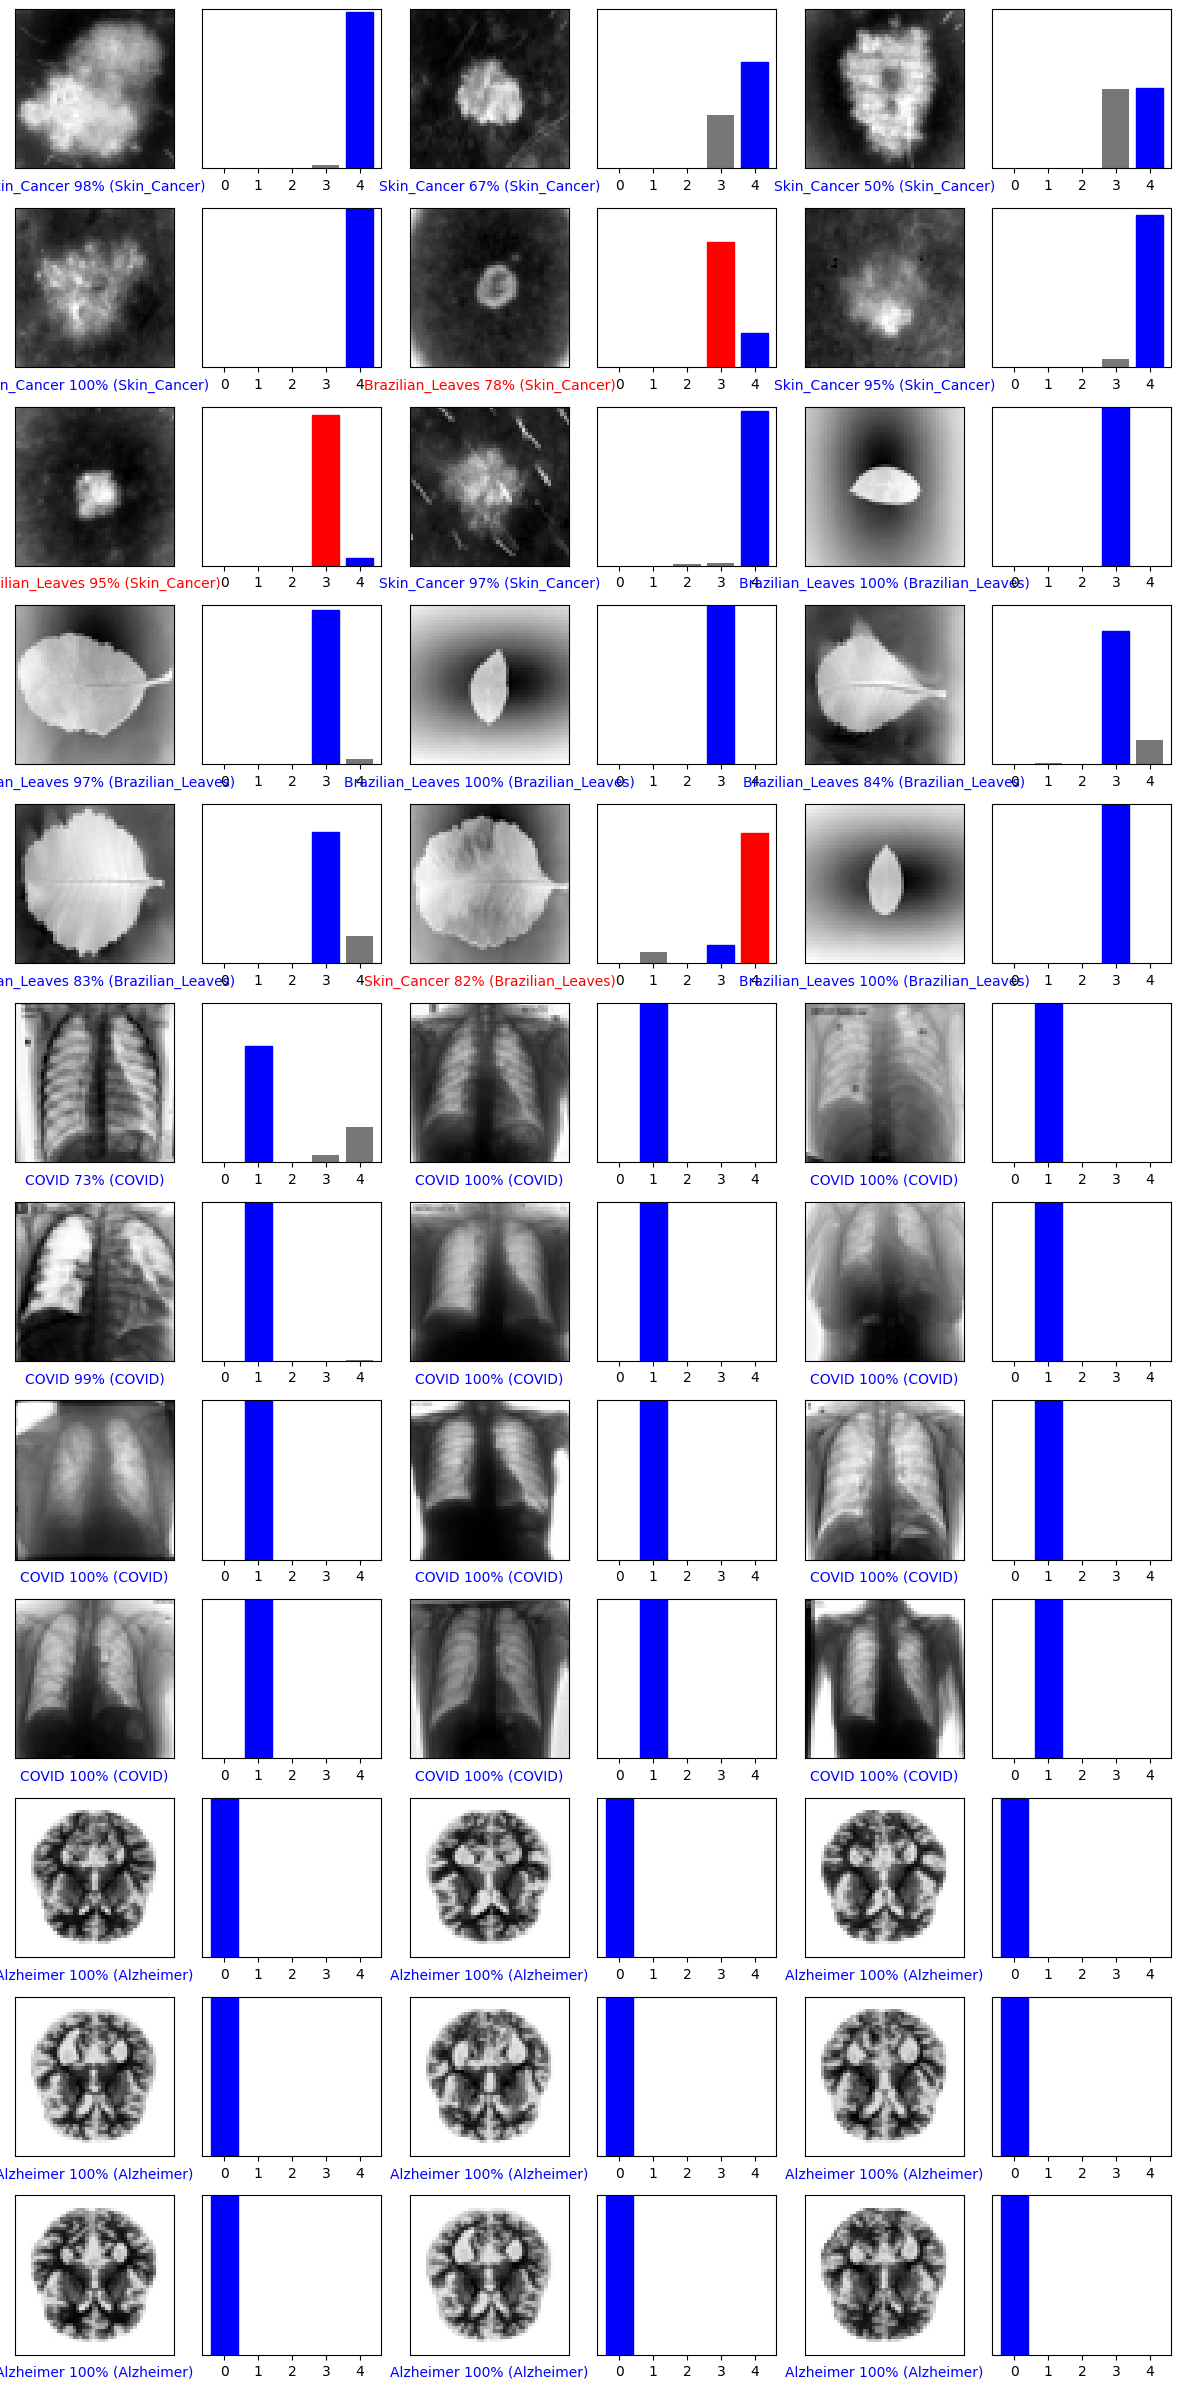

In [51]:
# Previsões corretas são marcadas em azul, erradas em vermelho
num_rows = 12
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()